In [3]:
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

In [ ]:
fits_file = "tpf/tess-s0001-4-1_64.525833_-63.615669_64x64_astrocut.fits"

In [ ]:
cpm = tess_cpm.CPM(fits_file, remove_bad=True)

In [ ]:
cpm.set_poly_model(1, 4, 0.1)

In [ ]:
cpm.set_target_exclusion_predictors(32, 32)

In [ ]:
cpm.lsq(0.5, rescale=True, polynomials=True)

In [ ]:
tess_cpm.summary_plot(cpm, 10)

In [ ]:
cpm.entire_image(0.5, polynomials=True)

In [ ]:
tess_cpm.summary_plot(cpm, 10)

In [ ]:
apt, apt_lc = cpm.difference_image_sap(32, 32, 2, polynomials=True)

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(cpm.time, apt_lc)

# apt = apt.reshape(apt.shape[0], 9)
# for i in range(9):
#     plt.plot(cpm.time, apt[:, i])
plt.plot(cpm.time, apt_lc, ".", color="Red")

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [ ]:
from astroquery.mast import Tesscut

In [ ]:
c = SkyCoord(64.525833, -63.615669, unit='deg')

In [ ]:
c.dec

In [ ]:
tesscut_test_download = Tesscut.download_cutouts(c)

In [ ]:
c = SkyCoord("5:33:05.28 -69:30:31.44", unit=(u.hourangle, u.deg))

In [ ]:
moa = Tesscut.download_cutouts(c, size=64, sector=2)

In [ ]:
fits_file = "./tess-s0002-4-2_83.272000_-69.508733_64x64_astrocut.fits"
c = tess_cpm.CPM(fits_file, remove_bad=True)
plt.subplot(projection=c.wcs_info)
plt.imshow(c.pixel_medians, vmin=np.percentile(c.pixel_medians, 0),
           vmax=np.percentile(c.pixel_medians, 99))

world = c.wcs_info.wcs_pix2world(32, 32, 0)
print(world)
print(c.wcs_info.wcs_world2pix(world[0], world[1], 0))

In [ ]:
c.set_target_exclusion_predictors(32, 32, exclusion=8)
c.set_poly_model(2, 4, 1.0)

In [ ]:
c.lsq(0.5, rescale=True, polynomials=True)

In [ ]:
tess_cpm.summary_plot(c, 10)

In [ ]:
c.entire_image(0.5, rescale=True, polynomials=True)

In [ ]:
# apt, apt_lc = c.difference_image_sap(32, 32, 2, exclusion=8, polynomials=True)
# print(apt.shape)
print(np.all((c.target_fluxes - c.cpm_prediction) == apt[:, 2, 2]))
plt.plot(c.time, c.target_fluxes - c.cpm_prediction)
plt.plot(c.time, apt[:, 2, 2])

In [ ]:
plt.figure(figsize=(15, 10))
for p in range(3):
    pixels = 2*p+1
    print(pixels**2)
    apt, apt_lc = c.difference_image_sap(32, 32, p, polynomials=True)
    plt.plot(c.time, apt_lc, ".", label="{}x{}".format(pixels, pixels))
plt.legend()

In [ ]:
plt.figure(figsize=(15 ,10))
apt = apt.reshape(apt.shape[0], 9)
for i in range(9):
    plt.plot(c.time, apt[:, i], label="{}".format(i))
# plt.plot(c.time, apt_lc, ".", color="Red")
# plt.legend()

In [ ]:
from IPython.display import HTML
import matplotlib.animation as animation
c.entire_image(0.5, rescale=True, polynomials=True)
diff = c.im_diff

fig = plt.figure(figsize=(10, 10))

ims = []
for i in range(0, diff.shape[0], 10):
    im = plt.imshow(diff[i], origin="lower", animated=True,
                   vmin=np.percentile(diff, 1), vmax=np.percentile(diff, 100));
    ims.append([im]);
fig.colorbar(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000);

HTML(ani.to_jshtml())

In [ ]:
c.set_target_exclusion_predictors(55, 40)
c.lsq(0.3, polynomials=False)
tess_cpm.summary_plot(c, 10)

In [ ]:
c.set_target_exclusion_predictors(55, 40)
c.lsq(0.3, polynomials=True)
tess_cpm.summary_plot(c, 10)

In [ ]:
ap, lc = c.difference_image_sap(55, 40, 1)

In [ ]:
plt.figure(figsize=(15, 10))
ap = ap.reshape(ap.shape[0], 9)
for i in range(9):
    plt.plot(c.time, ap[:, i], '-')
plt.plot(c.time, lc)

In [ ]:
I = np.identity(10)
ll = np.repeat(2, 6)
mm = np.repeat(4, 4)
i = np.hstack((ll, mm))
i

In [ ]:
i*I

In [ ]:
2*cpm.scaled_centered_time

In [ ]:
x = np.arange(25).reshape(5, 5)

In [ ]:
x[np.array([2,3,4]), np.array([1,2,3,4,5])]

In [ ]:
r = np.repeat(np.arange(31, 34), 3)
c = np.tile(np.arange(21, 24), 3)

In [ ]:
r

In [ ]:
c

In [ ]:
for (row, col) in zip(r, c):
    print(row, col)

In [ ]:
from astropy.io import fits
with fits.open(fits_file, mode="readonly") as hdulist:
    wcs_info = WCS(hdulist[2].header)

In [ ]:
wcs_info

In [ ]:
plt.subplot(111, projection=wcs_info)
plt.imshow(c.pixel_medians, origin="lower")

In [ ]:
plt.subplot(111)
plt.imshow(c.pixel_medians)

In [2]:
a_f = "tpf/tess-s0001-4-1_64.525833_-63.615669_64x64_astrocut.fits"
a = tess_cpm.CPM(a_f, remove_bad=True)

Removing bad values by using the TESS provided "QUALITY" array


In [3]:
a.set_poly_model(2, 4, 0.1)
a.set_target_exclusion_predictors(32, 32)
a.lsq(0.5, rescale=True, polynomials=True)

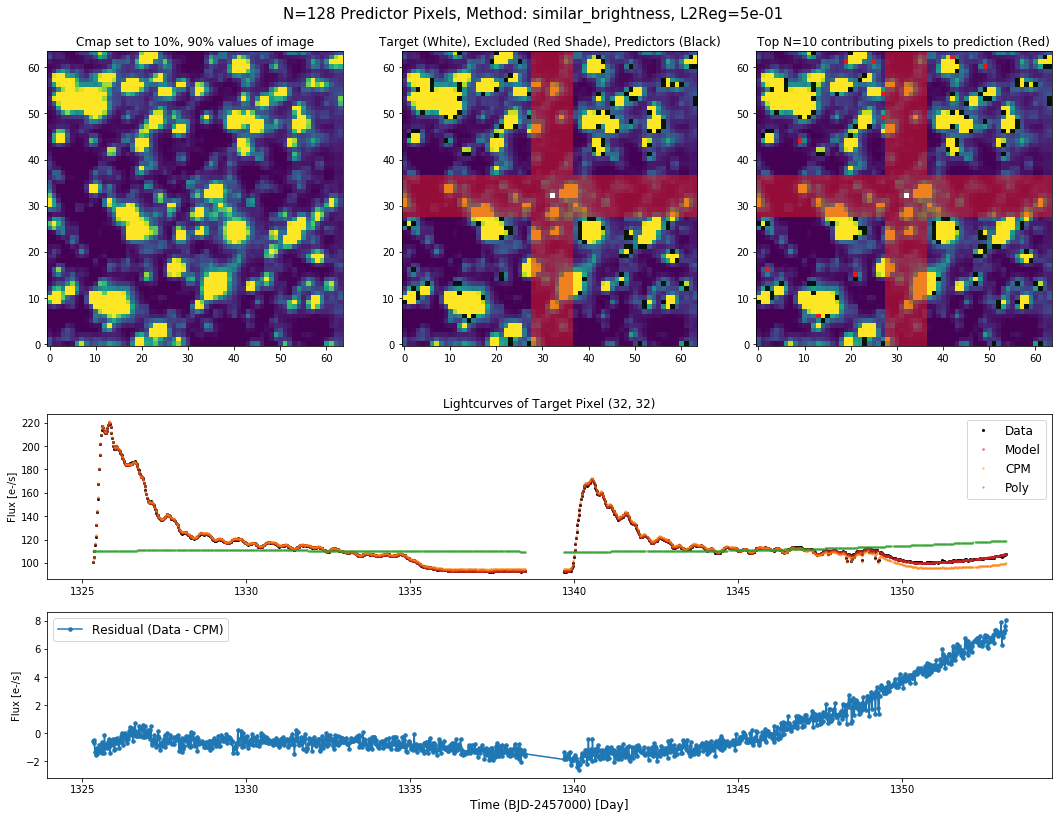

In [4]:
tess_cpm.summary_plot(a, 10, save=True)

In [7]:
a_apt, a_lc = a.difference_image_sap(32, 32, 0, polynomials=True)

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(a.time, a_lc, ".")

In [5]:
b_f = "tpf/tess-s0002-4-1_64.525833_-63.615669_64x64_astrocut.fits"
b = tess_cpm.CPM(b_f, remove_bad=True)
b.set_poly_model(2, 4, 0.1)
b.set_target_exclusion_predictors(32, 32)
b.lsq(0.5, rescale=True, polynomials=True)

Removing bad values by using the TESS provided "QUALITY" array


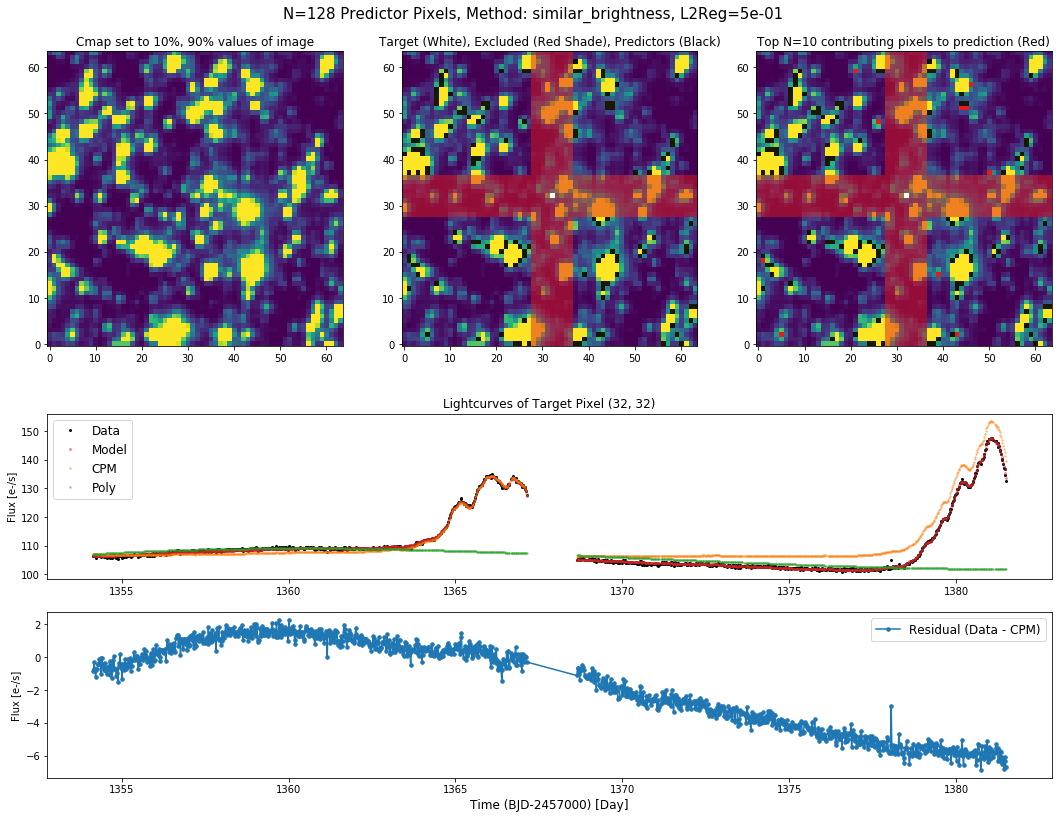

In [6]:
tess_cpm.summary_plot(b, 10, save=True)

In [8]:
b_apt, b_lc = b.difference_image_sap(32, 32, 0, polynomials=True)

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(b.time, b_lc, ".")

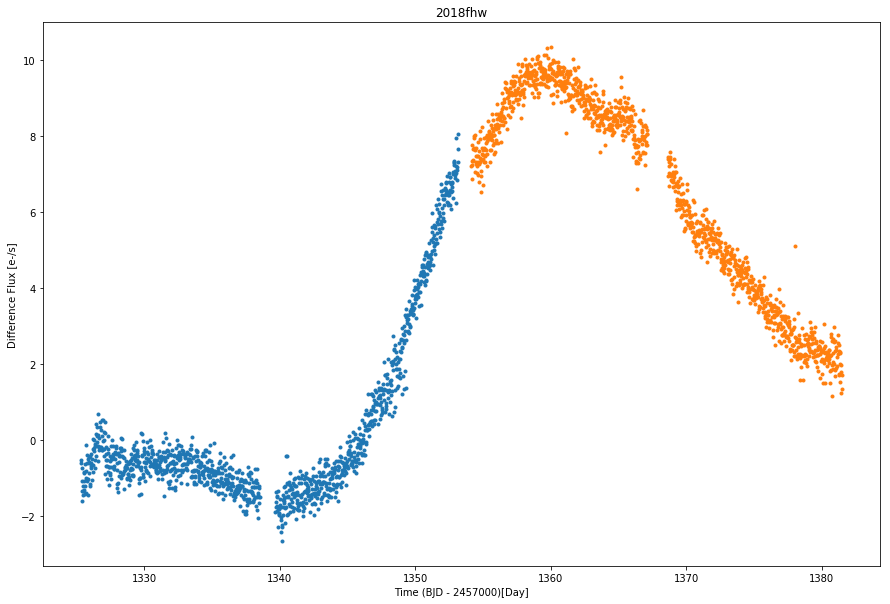

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(a.time, a_lc, ".")
plt.plot(b.time, b_lc + a_lc[-1], "."),
plt.xlabel("Time (BJD - 2457000)[Day]")
plt.ylabel("Difference Flux [e-/s]")
plt.title("2018fhw")
plt.savefig("2018fhw.png", dpi=150)

In [ ]:
def stitch(a_time, b_time, a_flux, b_flux, points):
    tot_time = np.hstack((a_time[-points:], b_time[:points]))
    scaled_tot_time = ((tot_time - (tot_time.max() + tot_time.min())/2)
                      / (tot_time.max() - tot_time.min()))
#     ((self.time - (self.time.max() + self.time.min())/2) 
#                                     / (self.time.max() - self.time.min()))
    y = np.hstack((a_flux[-points:], b_flux[:points]))
    
    m = np.vander(scaled_tot_time, N=4)
    m = np.hstack((x, np.ones((scaled_tot_time.shape[0], 1))))
    m[-points:,-2] = 0
    m[:points, -1] = 0
    print(m[:, -2])
    print(m)
    print(m.shape)
    a = np.dot(m.T, m)
    b = np.dot(m.T, y)
        
        self.lsq_params = np.linalg.solve(a, b)

In [ ]:
stitch(a.time, b.time, a_lc, b_lc, 50)

In [4]:
fits_file = "tess-s0002-1-2_357.960320_-25.626803_64x64_astrocut.fits"

In [5]:
e = tess_cpm.CPM(fits_file, remove_bad=True)

Removing bad values by using the TESS provided "QUALITY" array


In [14]:
# e = tess_cpm.CPM(e, remove_bad=True)
e.set_poly_model(5, 4, 0.0)
# e.set_target_exclusion_predictors(50, 29, exclusion=5, exclusion_method="closest")
e.set_target_exclusion_predictors(32, 32, exclusion=5, exclusion_method="closest")

e.lsq(1.0, rescale=True, polynomials=False)

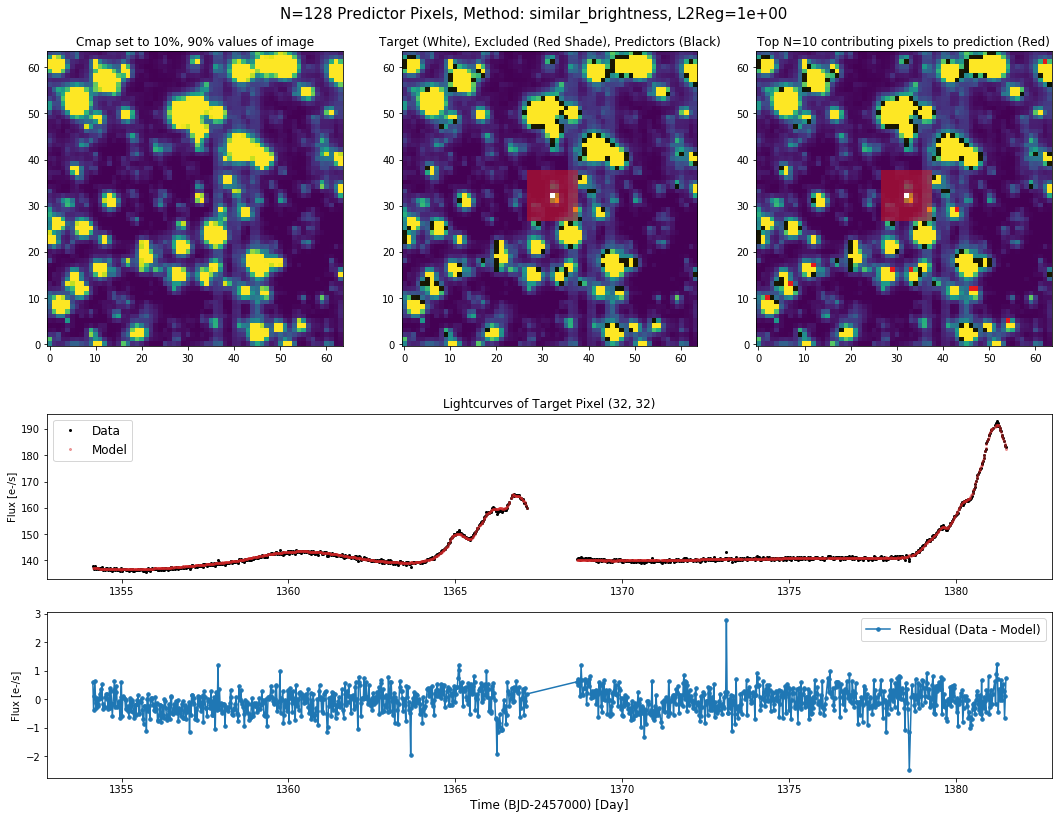

In [15]:
tess_cpm.summary_plot(e, 10)

In [16]:
apt, apt_lc = e.difference_image_sap(32, 32, 0, polynomials=False)

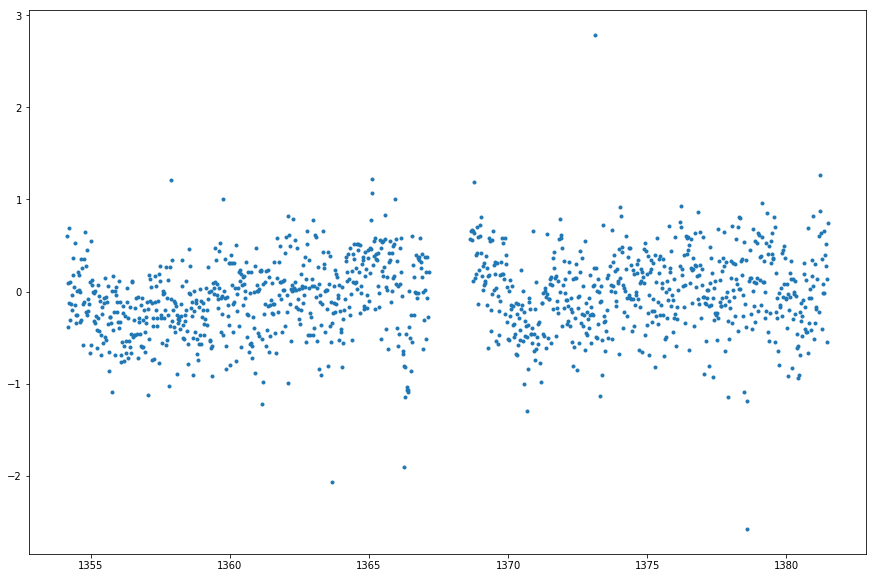

In [17]:
plt.figure(figsize=(15, 10))
# plt.plot(e.time, apt_lc, ".")
# plt.plot(e.time, e.target_fluxes - e.lsq_prediction, ".")
plt.plot(e.time, apt_lc, ".")
# apt = apt.reshape(apt.shape[0], 9)
# for i in range(9):
#     plt.plot(e.time, apt[:, i], ".")

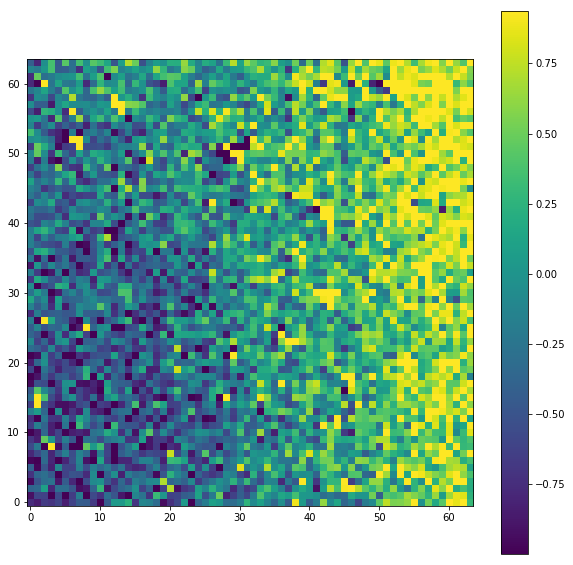

In [18]:
from IPython.display import HTML
import matplotlib.animation as animation
e.entire_image(1.0, rescale=True, polynomials=False)
diff = e.im_diff

fig = plt.figure(figsize=(10, 10))

ims = []
for i in range(0, diff.shape[0], 10):
    im = plt.imshow(diff[i], origin="lower", animated=True,
                   vmin=np.percentile(diff, 1), vmax=np.percentile(diff, 99));
    ims.append([im]);
fig.colorbar(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000);

HTML(ani.to_jshtml())

In [19]:
f = "tess-s0006-2-1_91.258333_-23.707500_64x64_astrocut.fits"

In [20]:
fe = tess_cpm.CPM(f, remove_bad=True)

Removing bad values by using the TESS provided "QUALITY" array


In [23]:
fe.set_poly_model(1, 4, 0.5)
fe.set_target_exclusion_predictors(32, 32, exclusion_method="closest")
fe.lsq(0.5, rescale=True, polynomials=True)

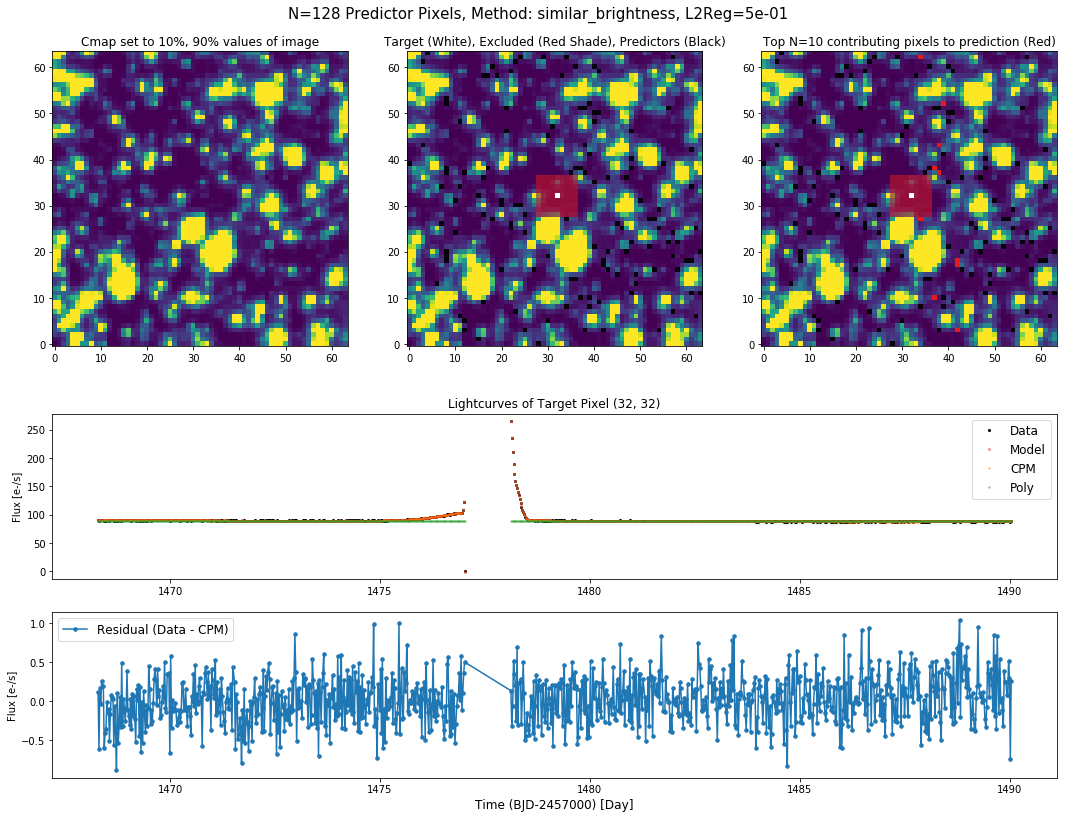

In [24]:
tess_cpm.summary_plot(fe, 10)

In [27]:
f_apt, f_apt_lc = fe.difference_image_sap(32, 32, 0)

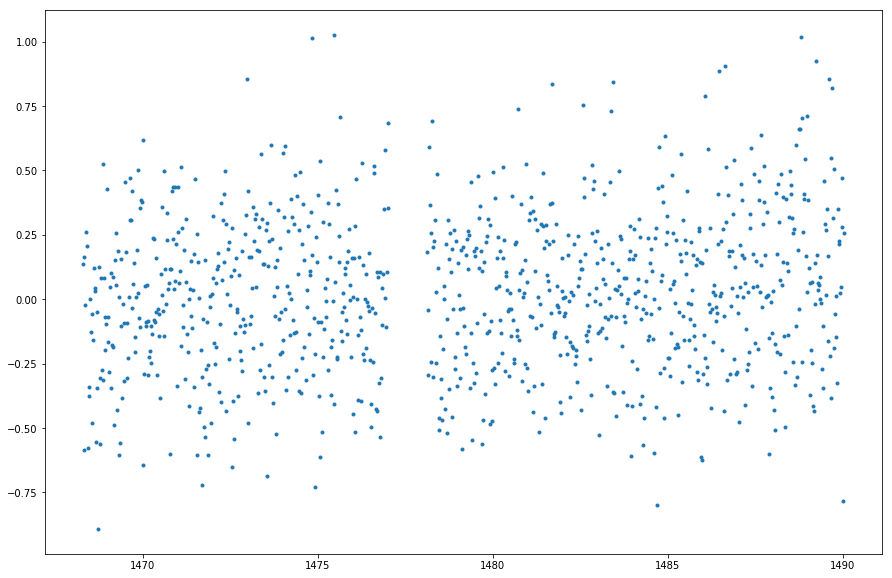

In [30]:
plt.figure(figsize=(15, 10))
plt.plot(fe.time, f_apt_lc, ".")

In [42]:
from lightkurve.lightcurve import TessLightCurve
from lightkurve.periodogram import LombScarglePeriodogram

In [50]:
lc = TessLightCurve(fe.time, f_apt_lc).flatten().remove_nans().remove_outliers()

In [51]:
cdpp = lc.estimate_cdpp()

In [52]:
print(cdpp)

3112212.3031263584


In [46]:
flc = lc.fold(2.4)

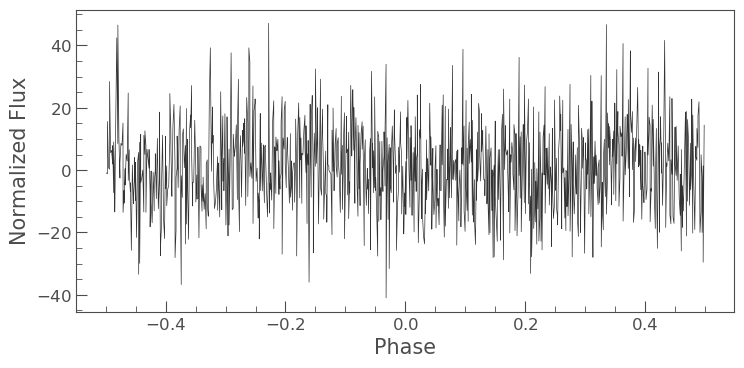

In [47]:
flc.plot()

In [53]:
LSP = LombScarglePeriodogram.from_lightcurve(lc)

/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)


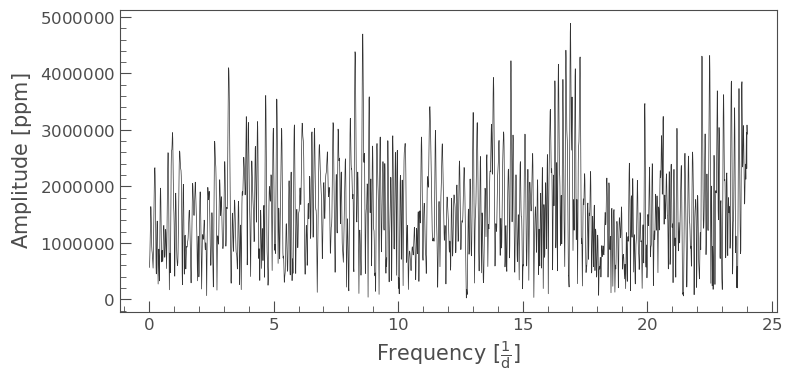

In [54]:
LSP.plot()